<h1 style="text-align: center;color:#e0fcfe">ML model for Hotel Cancellation prediction</h1>

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [75]:
df = pd.read_csv('../artifacts/raw/train.csv')
df.describe()

,Unnamed: 0,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000
mean,18124.971296,1.846761,0.107547,0.811371,2.202619,0.031702,85.127705,2017.822295,7.414576,15.605410,0.025327,0.024052,0.146761,103.460269,0.620331
std,10447.019717,0.517702,0.408537,0.868632,1.403409,0.175209,85.726494,0.382271,3.076761,8.727683,0.157120,0.392177,1.685864,35.061479,0.784661
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9067.750000,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,18135.500000,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,27150.500000,2.000000,0.000000,2.000000,3.000000,0.000000,127.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,36273.000000,4.000000,10.000000,6.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,365.000000,5.000000


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29020 entries, 0 to 29019
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            29020 non-null  int64  
 1   Booking_ID                            29020 non-null  object 
 2   no_of_adults                          29020 non-null  int64  
 3   no_of_children                        29020 non-null  int64  
 4   no_of_weekend_nights                  29020 non-null  int64  
 5   no_of_week_nights                     29020 non-null  int64  
 6   type_of_meal_plan                     29020 non-null  object 
 7   required_car_parking_space            29020 non-null  int64  
 8   room_type_reserved                    29020 non-null  object 
 9   lead_time                             29020 non-null  int64  
 10  arrival_year                          29020 non-null  int64  
 11  arrival_month  

In [5]:
df

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,34123,INN34124,2,0,0,2,Not Selected,0,Room_Type 1,12,2018,1,22,Online,0,0,0,75.00,0,Not_Canceled
1,356,INN00357,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
2,36185,INN36186,2,0,1,4,Meal Plan 1,0,Room_Type 1,141,2018,7,13,Offline,0,0,0,72.25,2,Not_Canceled
3,7737,INN07738,3,0,2,2,Not Selected,0,Room_Type 1,135,2018,7,15,Online,0,0,0,92.28,2,Not_Canceled
4,141,INN00142,2,0,0,2,Meal Plan 1,0,Room_Type 1,245,2018,6,17,Online,0,0,0,75.00,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29015,17677,INN17678,2,0,0,4,Meal Plan 1,0,Room_Type 5,19,2017,9,2,Offline,0,0,0,83.55,1,Not_Canceled
29016,32081,INN32082,2,0,2,3,Meal Plan 1,0,Room_Type 1,26,2018,7,3,Offline,0,0,0,85.00,0,Not_Canceled
29017,7259,INN07260,2,1,1,3,Meal Plan 2,0,Room_Type 1,150,2018,7,7,Online,0,0,0,173.25,0,Canceled
29018,21584,INN21585,2,1,0,2,Meal Plan 1,0,Room_Type 1,127,2018,12,22,Online,0,0,0,106.20,3,Not_Canceled


In [6]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [7]:
print(f'DF shape:{df.shape}')
df.drop(columns=["Unnamed: 0", "Booking_ID"], inplace=True) 
print(f'DF shape:{df.shape}')


DF shape:(29020, 20)
DF shape:(29020, 18)


In [8]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [9]:
print(f'DF duplicates {df.duplicated().sum()}')
df.drop_duplicates(inplace=True)
print(f'DF duplicates {df.duplicated().sum()}')

DF duplicates 7592
DF duplicates 0


In [10]:
df['no_of_adults'].value_counts()

no_of_adults
2    15596
1     3950
3     1751
0      117
4       14
Name: count, dtype: int64

In [11]:
df['no_of_children'].value_counts()

no_of_children
0     19304
1      1257
2       848
3        16
9         2
10        1
Name: count, dtype: int64

In [12]:
df['no_of_weekend_nights'].value_counts()

no_of_weekend_nights
0    9171
1    6090
2    5925
3     116
4      95
5      16
6      15
Name: count, dtype: int64

In [13]:
df['no_of_week_nights'].value_counts()

no_of_week_nights
2     5967
1     5817
3     4600
4     1997
0     1497
5     1165
6      147
7       88
8       53
10      34
9       27
11      12
14       6
15       6
13       5
12       5
17       2
Name: count, dtype: int64

In [14]:
df['required_car_parking_space'].value_counts()

required_car_parking_space
0    20527
1      901
Name: count, dtype: int64

In [15]:
df['room_type_reserved'].value_counts()

room_type_reserved
Room_Type 1    15451
Room_Type 4     4378
Room_Type 6      777
Room_Type 2      506
Room_Type 5      189
Room_Type 7      122
Room_Type 3        5
Name: count, dtype: int64

In [16]:
df['avg_price_per_room'].value_counts()

avg_price_per_room
65.00     434
0.00      368
75.00     343
95.00     276
85.00     271
         ... 
167.22      1
92.60       1
73.56       1
102.74      1
106.28      1
Name: count, Length: 3519, dtype: int64

In [17]:
df['arrival_month'].value_counts()

arrival_month
10    2646
8     2542
9     2518
12    1971
7     1850
11    1823
4     1668
3     1646
6     1529
5     1504
2     1075
1      656
Name: count, dtype: int64

In [18]:
df['market_segment_type'].value_counts()

market_segment_type
Online           16432
Offline           3471
Corporate         1169
Complementary      274
Aviation            82
Name: count, dtype: int64

In [19]:
df['repeated_guest'].value_counts()

repeated_guest
0    20750
1      678
Name: count, dtype: int64

In [20]:
df['no_of_previous_cancellations'].value_counts()

no_of_previous_cancellations
0     21221
1       103
2        33
3        29
11       24
4         9
5         7
13        1
6         1
Name: count, dtype: int64

In [21]:
df['booking_status'].value_counts()

booking_status
Not_Canceled    15282
Canceled         6146
Name: count, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21428 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21428 non-null  int64  
 1   no_of_children                        21428 non-null  int64  
 2   no_of_weekend_nights                  21428 non-null  int64  
 3   no_of_week_nights                     21428 non-null  int64  
 4   type_of_meal_plan                     21428 non-null  object 
 5   required_car_parking_space            21428 non-null  int64  
 6   room_type_reserved                    21428 non-null  object 
 7   lead_time                             21428 non-null  int64  
 8   arrival_year                          21428 non-null  int64  
 9   arrival_month                         21428 non-null  int64  
 10  arrival_date                          21428 non-null  int64  
 11  market_segment_type 

In [23]:
num_col = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
tot_cat_col = df.select_dtypes(include=["object", "category"]).columns.tolist()

target_col = ["booking_status"]
cat_col = tot_cat_col.copy()
cat_col.remove("booking_status")

In [24]:
print(tot_cat_col)

['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']


In [25]:
print('categorical_features:')
display(cat_col)
print('numerical_features:')
display(num_col)
print("Target col")
print(target_col)

categorical_features:


['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

numerical_features:


['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

Target col
['booking_status']


<h2 style="text-align: center;color:#e0fcfe">Data Analysis</h2>

In [26]:
data = df.copy()

In [27]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df, title="My Data Report", explorative=True)
# profile.to_file("output_report.html")


<h3 style="text-align: center;color:#e0fcfe">Univariate Analysis</h3>

In [28]:
def num_dist_plot(df, num_features):
    fig, axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features)*5))
    if len(num_features)==1:
        axes=[axes]

    for i, col in enumerate(num_features):
        sns.histplot(data=df, x=col, ax=axes[i][0], kde=True, palette="Viridis")
        axes[i][0].set_title(f"Histogram : {col}")

        sns.boxplot(data=df, x=col, ax=axes[i][1], palette="Blues")
        axes[i][1].set_title(f"Boxplot : {col}")

    plt.tight_layout()
    plt.show();


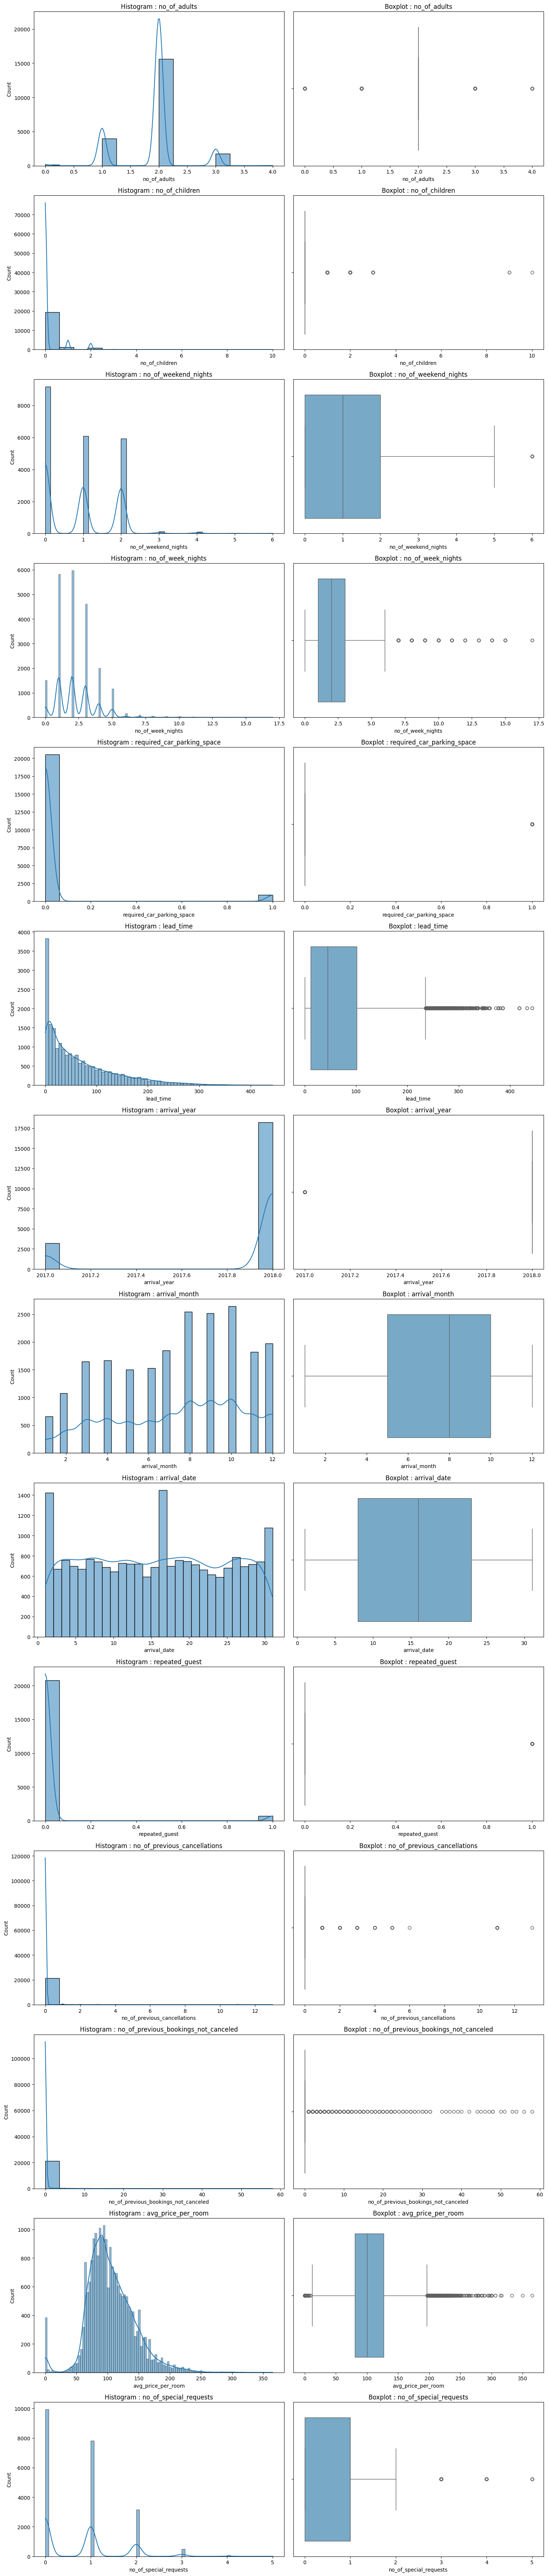

In [29]:
num_dist_plot(data, num_col)

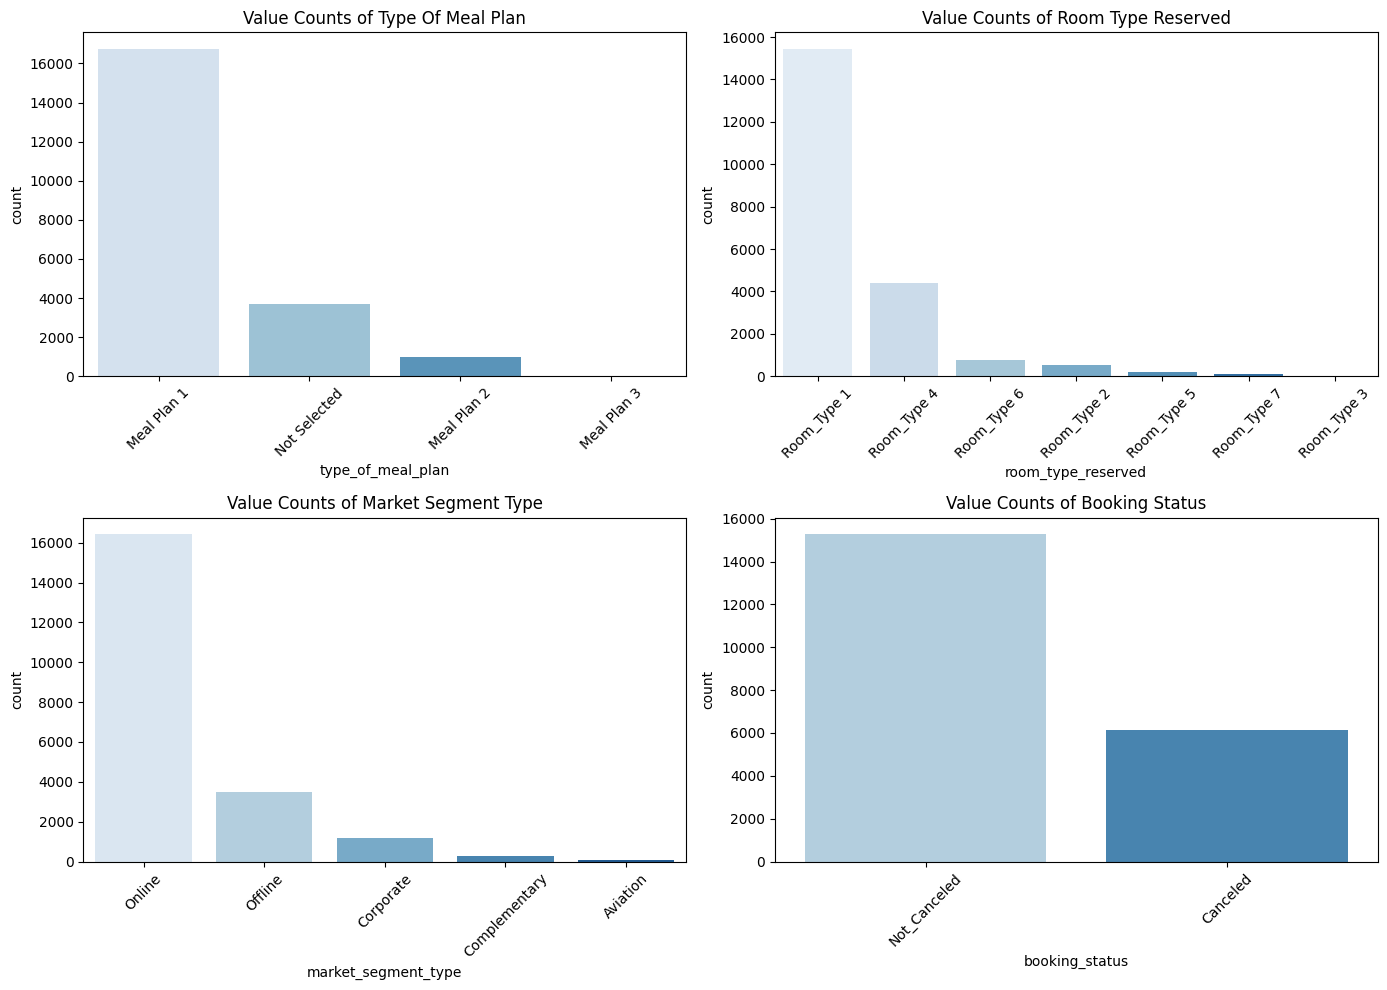

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Plot each categorical feature
for idx, col in enumerate(tot_cat_col):
    sns.countplot(data=df, x=col, ax=axes[idx], order=df[col].value_counts().index, palette="Blues")
    axes[idx].set_title(f"Value Counts of {col.replace('_', ' ').title()}")
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<h3 style="text-align: center;color:#e0fcfe">Bivariate Analysis</h3>

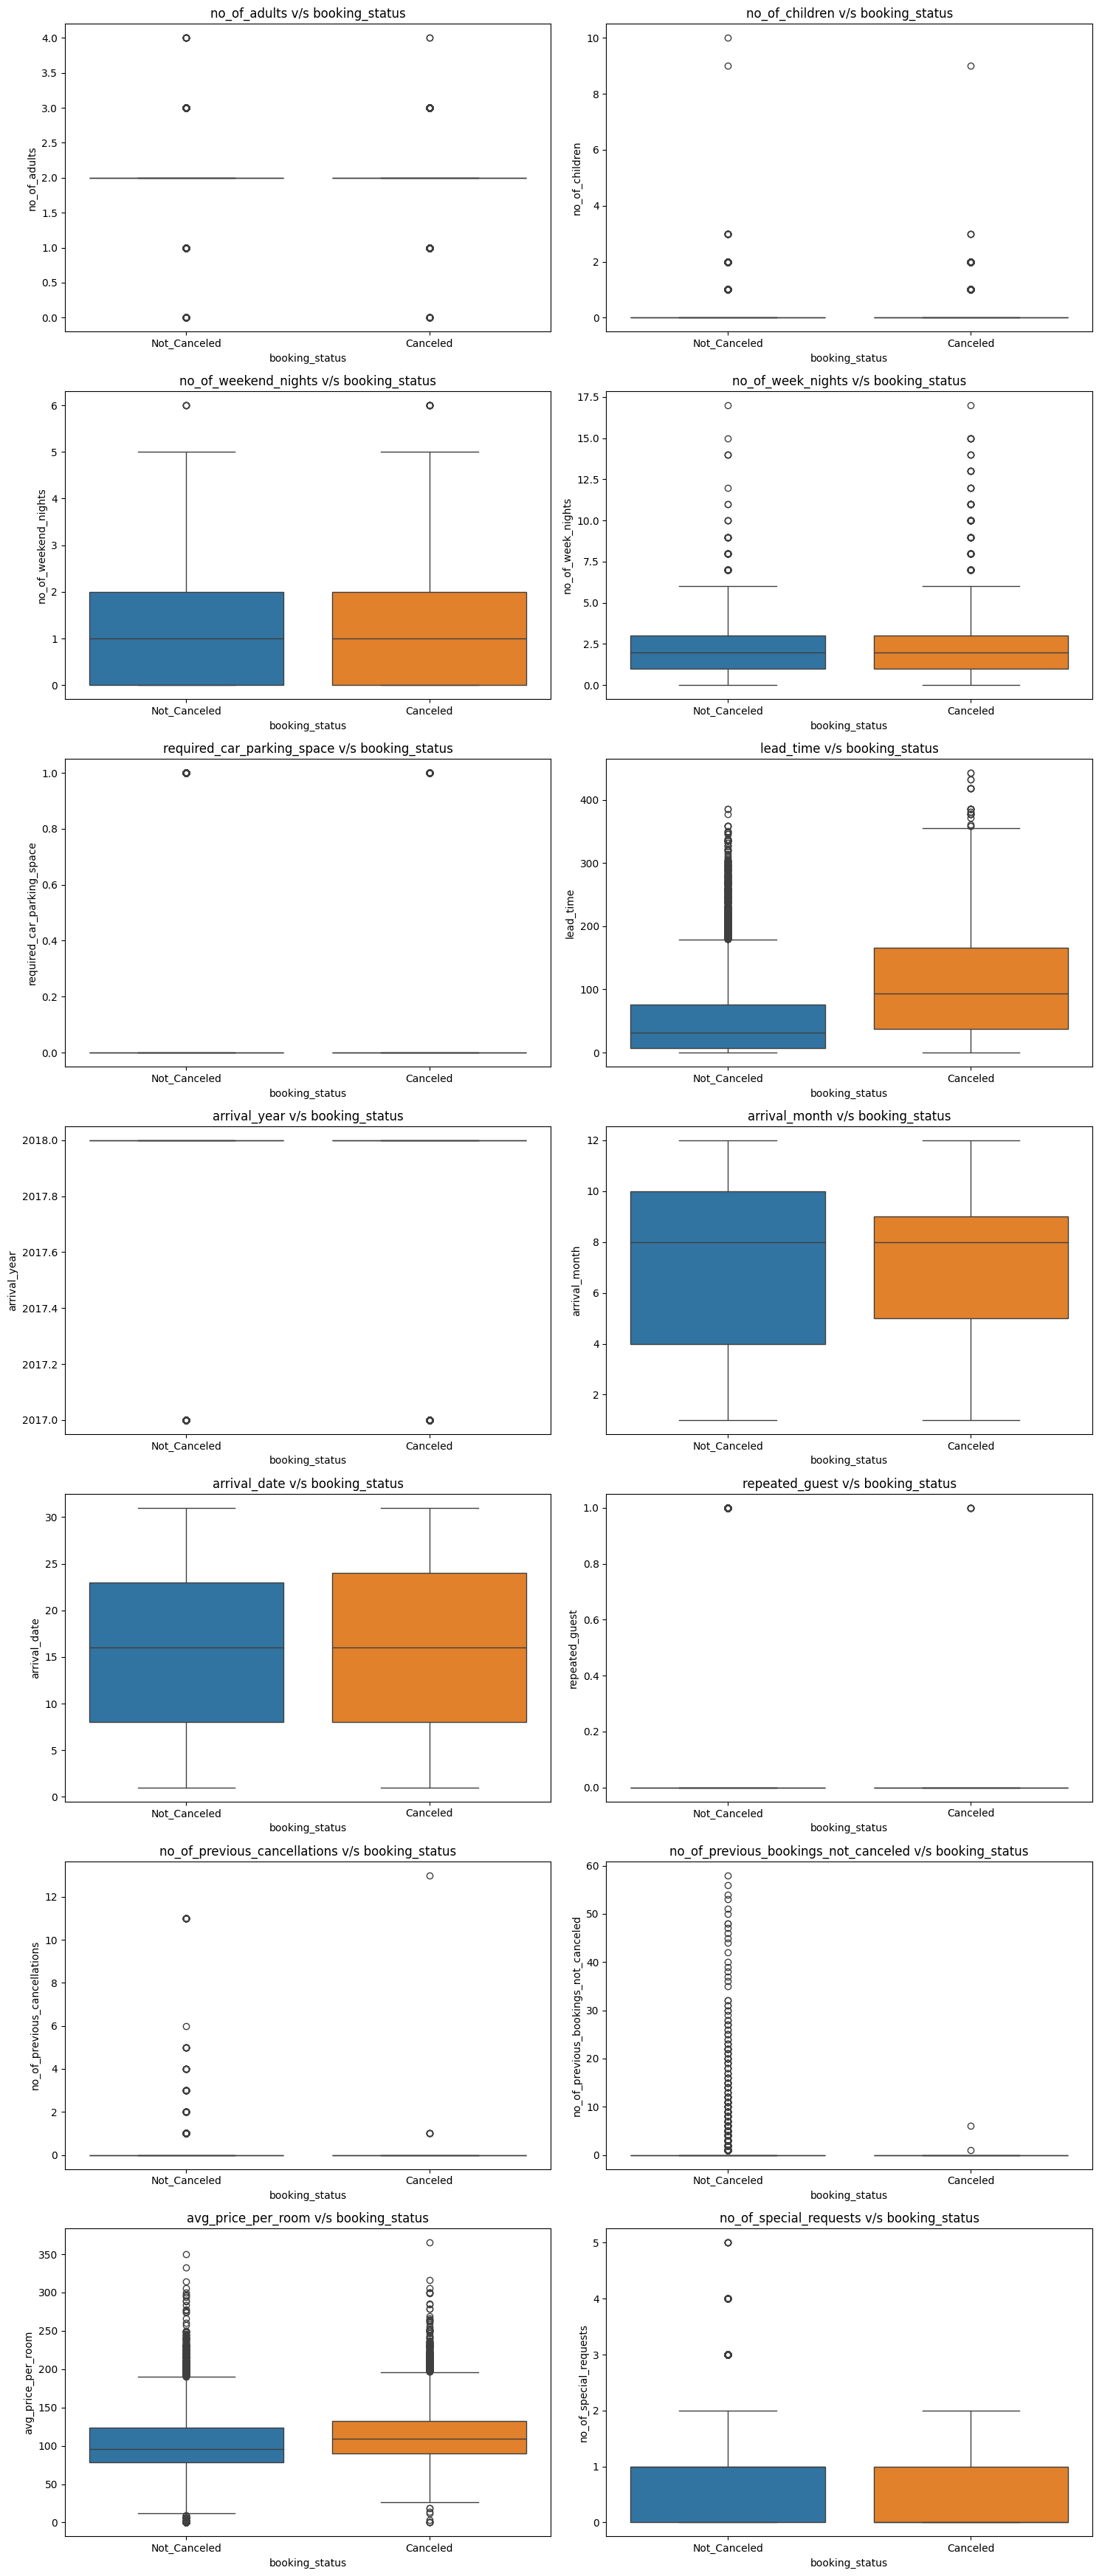

In [31]:
def plot_bivariate_num(df, trg, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
    axes = axes.flatten()

    for i, col in enumerate(num_features):
        sns.boxplot(x=trg, y=col, ax=axes[i], data=df, palette="tab10")
        axes[i].set_title(f"{col} v/s {trg}")

    plt.tight_layout()
    plt.show();

plot_bivariate_num(df, 'booking_status', num_col)

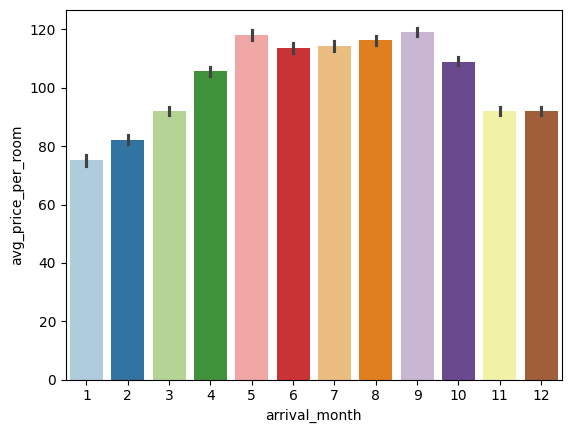

In [32]:
sns.barplot(x="arrival_month", y="avg_price_per_room", data=data, palette='Paired')
plt.show();

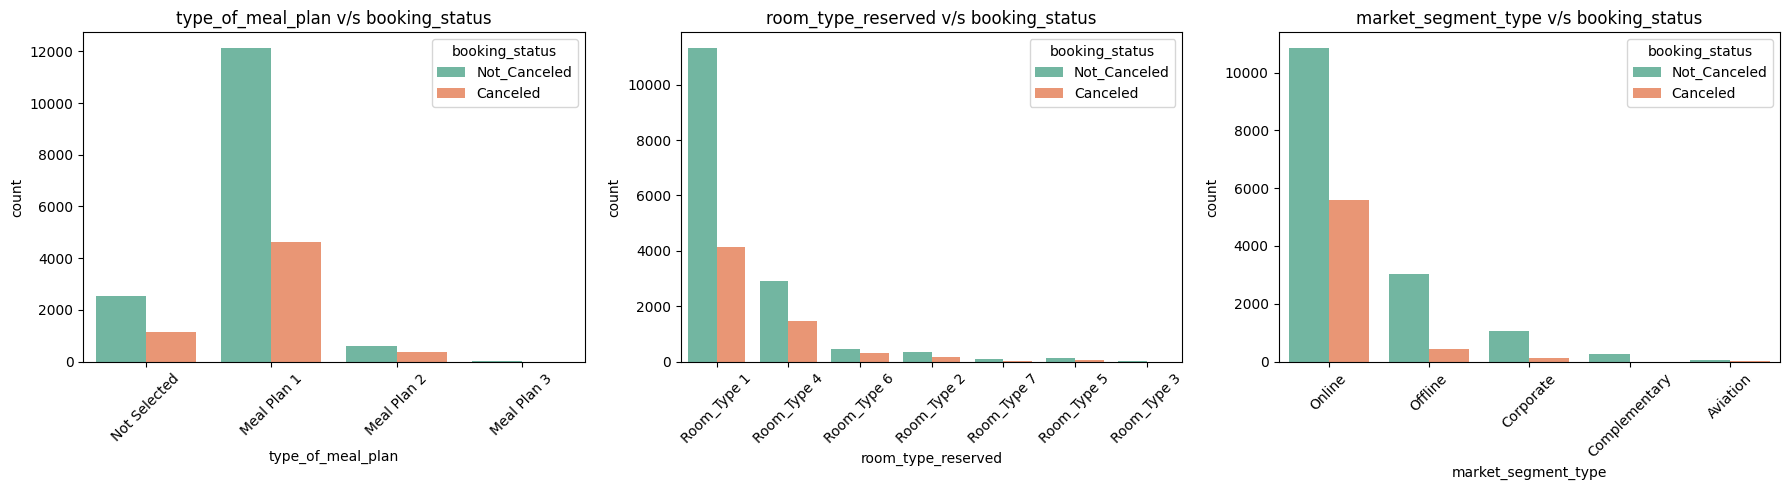

In [33]:
def plot_bivarite_cat(df, trg, cat_features):
    num_plots = len(cat_features)
    num_rows = (num_plots+1)//3

    fig, axes = plt.subplots(num_rows, 3, figsize=(18, num_rows*5))
    axes = axes.flatten()
    
    for i, col in enumerate(cat_features):
        sns.countplot(data=df, x=col, hue=trg, palette='Set2', ax=axes[i])
        axes[i].set_title(f"{col} v/s {trg}")
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show();

plot_bivarite_cat(data, 'booking_status', cat_col) 

<h3 style="text-align: center;color:#e0fcfe">Data Procesing</h3>

In [34]:
df.sample(4)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
10529,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2017,11,19,Corporate,0,0,0,65.0,0,Not_Canceled
23335,2,1,0,1,Not Selected,0,Room_Type 1,4,2018,9,20,Offline,0,0,0,152.2,0,Not_Canceled
17900,1,0,0,2,Meal Plan 2,0,Room_Type 1,0,2018,6,15,Offline,0,0,0,87.0,0,Not_Canceled
1429,2,0,0,1,Not Selected,0,Room_Type 1,72,2018,3,16,Online,0,0,0,67.5,0,Canceled


In [35]:
### Cateogrical features ---> Encoding
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

In [36]:
mapping = {}

for col in tot_cat_col:
    df[col] = LE.fit_transform(df[col])

    mapping[col] = {label:code for label, code in zip(LE.classes_, LE.fit_transform(LE.classes_))}

display(mapping)

{'type_of_meal_plan': {'Meal Plan 1': 0,
  'Meal Plan 2': 1,
  'Meal Plan 3': 2,
  'Not Selected': 3},
 'room_type_reserved': {'Room_Type 1': 0,
  'Room_Type 2': 1,
  'Room_Type 3': 2,
  'Room_Type 4': 3,
  'Room_Type 5': 4,
  'Room_Type 6': 5,
  'Room_Type 7': 6},
 'market_segment_type': {'Aviation': 0,
  'Complementary': 1,
  'Corporate': 2,
  'Offline': 3,
  'Online': 4},
 'booking_status': {'Canceled': 0, 'Not_Canceled': 1}}

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21428 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21428 non-null  int64  
 1   no_of_children                        21428 non-null  int64  
 2   no_of_weekend_nights                  21428 non-null  int64  
 3   no_of_week_nights                     21428 non-null  int64  
 4   type_of_meal_plan                     21428 non-null  int64  
 5   required_car_parking_space            21428 non-null  int64  
 6   room_type_reserved                    21428 non-null  int64  
 7   lead_time                             21428 non-null  int64  
 8   arrival_year                          21428 non-null  int64  
 9   arrival_month                         21428 non-null  int64  
 10  arrival_date                          21428 non-null  int64  
 11  market_segment_type 

In [38]:
#### CHECK MULTICOLLINEARITY: (avoid it, if true)

from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF
from statsmodels.tools.tools import add_constant

In [39]:
X = add_constant(df)

vif_data = pd.DataFrame()

vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

display(vif_data)

,feature,VIF
0,const,4.135519e+07
1,no_of_adults,1.335660e+00
2,no_of_children,1.278707e+00
3,no_of_weekend_nights,1.073778e+00
4,no_of_week_nights,1.126166e+00
5,type_of_meal_plan,1.176838e+00
6,required_car_parking_space,1.033814e+00
7,room_type_reserved,1.545119e+00
8,lead_time,1.412501e+00
9,arrival_year,1.289552e+00


-  Our data does not have any Multi-collinearity, (**VIF[c]<5** for c in df.cols) so we can use all the features for our model

In [40]:
corr = df.corr()
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.051825,0.096903,0.116585,-0.009952,0.003584,0.272589,0.150275,0.099640,0.006874,0.019536,0.305666,-0.234613,-0.051943,-0.140057,0.323544,0.156304,-0.088824
no_of_children,-0.051825,1.000000,0.009219,0.012545,-0.103324,0.021336,0.351700,0.006192,0.027920,0.006753,0.022287,0.098951,-0.048677,-0.020282,-0.029267,0.348769,0.097049,-0.060670
no_of_weekend_nights,0.096903,0.009219,1.000000,0.223659,-0.045278,-0.056073,0.032824,0.133649,0.028968,0.018754,0.004639,0.088217,-0.087208,-0.028110,-0.037941,-0.000765,0.016052,-0.069577
no_of_week_nights,0.116585,0.012545,0.223659,1.000000,-0.076258,-0.057787,0.081694,0.224191,0.019595,0.034932,-0.004986,0.119938,-0.118892,-0.033717,-0.058135,0.018238,0.031148,-0.123941
type_of_meal_plan,-0.009952,-0.103324,-0.045278,-0.076258,1.000000,-0.027987,-0.245199,-0.053884,0.095400,0.009470,-0.003849,0.183032,-0.068959,-0.006701,-0.044000,-0.104796,-0.005132,-0.031952
required_car_parking_space,0.003584,0.021336,-0.056073,-0.057787,-0.027987,1.000000,0.024709,-0.040813,0.003569,-0.015300,-0.002197,-0.034758,0.104269,0.021974,0.046252,0.064935,0.069809,0.087620
room_type_reserved,0.272589,0.351700,0.032824,0.081694,-0.245199,0.024709,1.000000,-0.020408,0.084816,0.005829,0.028437,0.085211,-0.041222,-0.012360,-0.017253,0.489439,0.089286,-0.068022
lead_time,0.150275,0.006192,0.133649,0.224191,-0.053884,-0.040813,-0.020408,1.000000,0.166668,0.137578,0.034781,0.142626,-0.147763,-0.052060,-0.087030,-0.043590,-0.009516,-0.374503
arrival_year,0.099640,0.027920,0.028968,0.019595,0.095400,0.003569,0.084816,0.166668,1.000000,-0.321018,0.015506,0.109871,-0.012579,0.009521,0.023554,0.179107,-0.004072,-0.153549
arrival_month,0.006874,0.006753,0.018754,0.034932,0.009470,-0.015300,0.005829,0.137578,-0.321018,1.000000,-0.023456,-0.011005,-0.006925,-0.052622,-0.014770,0.069201,0.134681,0.007970


In [41]:
target = target_col
sorted_cols = corr[target].abs().sort_values(ascending=False, by=target).index
corr = df[sorted_cols].corr()


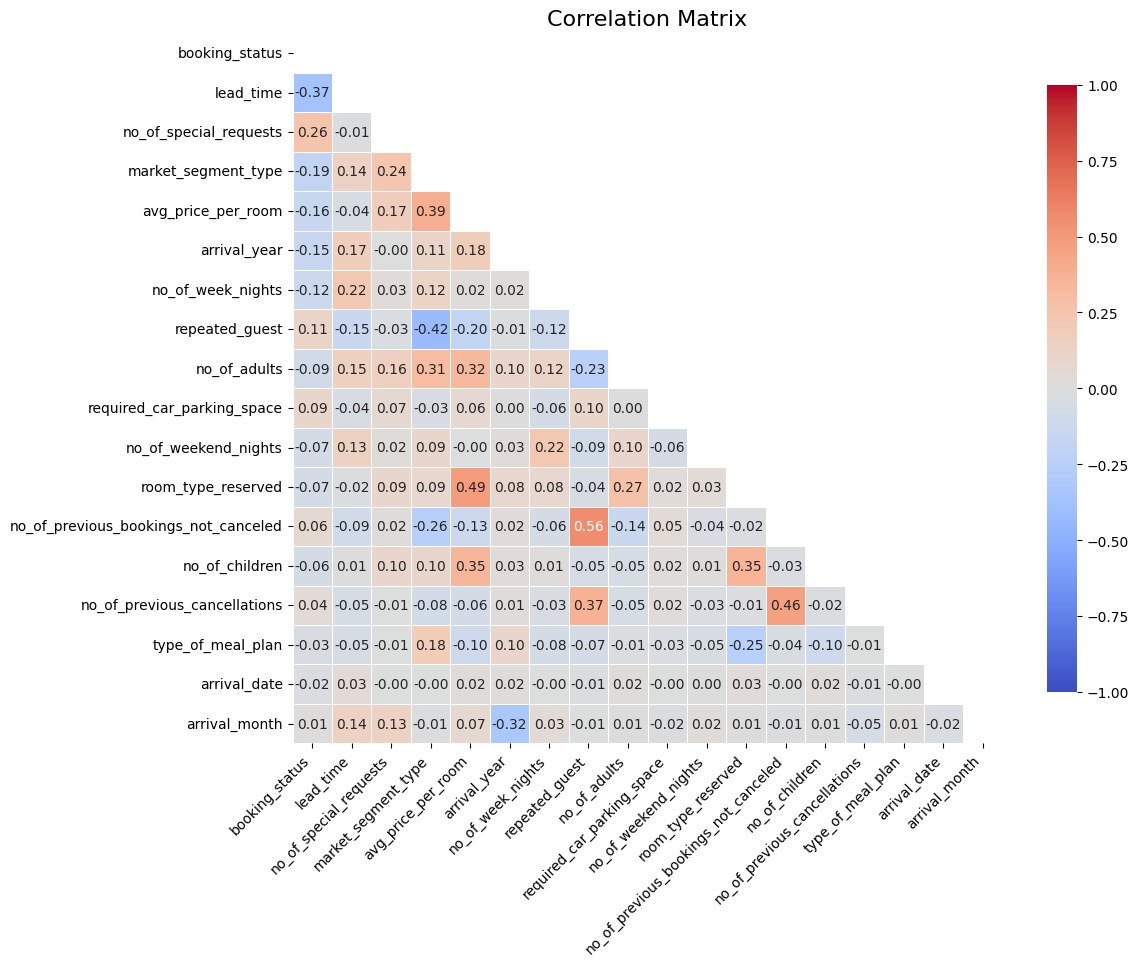

In [42]:
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12,10))
sns.heatmap(corr, 
            mask=mask,                # Hide upper triangle
            annot=True, 
            fmt=".2f",                # Round off to 2 decimals
            linewidths=0.5,
            cmap="coolwarm",          # Better diverging colormap
            vmin=-1, vmax=1,          # Set consistent color scale
            square=True,              # Make each cell square
            cbar_kws={"shrink": .8},  # Shrink colorbar
            annot_kws={"size": 10})   # Smaller font size for annotations

plt.title("Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x labels
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [43]:
#### SKEWNESS 
skewness = df.skew()
skewness

no_of_adults                            -0.314603
no_of_children                           4.143756
no_of_weekend_nights                     0.625703
no_of_week_nights                        1.488749
type_of_meal_plan                        1.628627
required_car_parking_space               4.563910
room_type_reserved                       1.399280
lead_time                                1.398840
arrival_year                            -1.968859
arrival_month                           -0.297300
arrival_date                             0.015919
market_segment_type                     -2.360142
repeated_guest                           5.351766
no_of_previous_cancellations            21.957416
no_of_previous_bookings_not_canceled    16.704832
avg_price_per_room                       0.562854
no_of_special_requests                   0.908963
booking_status                          -0.942758
dtype: float64

In [44]:
#### Apply Log Transform for skewwed cols
for col in df.columns:
    if(skewness[col] > 5):
        df[col] = np.log1p(df[col])

skewness = df.skew()
skewness

no_of_adults                            -0.314603
no_of_children                           4.143756
no_of_weekend_nights                     0.625703
no_of_week_nights                        1.488749
type_of_meal_plan                        1.628627
required_car_parking_space               4.563910
room_type_reserved                       1.399280
lead_time                                1.398840
arrival_year                            -1.968859
arrival_month                           -0.297300
arrival_date                             0.015919
market_segment_type                     -2.360142
repeated_guest                           5.351766
no_of_previous_cancellations            13.932005
no_of_previous_bookings_not_canceled     7.703314
avg_price_per_room                       0.562854
no_of_special_requests                   0.908963
booking_status                          -0.942758
dtype: float64

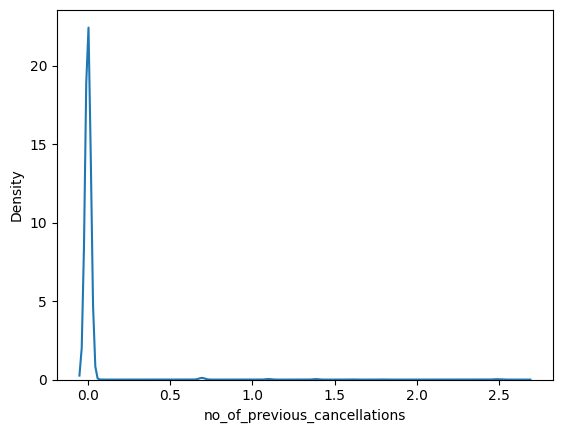

In [45]:
sns.kdeplot(data=df, x="no_of_previous_cancellations");

In [46]:
#### CLASS IMBALANCE
df["booking_status"].value_counts()

booking_status
1    15282
0     6146
Name: count, dtype: int64

In [47]:
### We can undersample, but high risk of valuable data loss
from imblearn.under_sampling import RandomUnderSampler

X = df.drop(columns=['booking_status'])
y = df['booking_status']

rus = RandomUnderSampler()
X_res, y_res = rus.fit_resample(X, y)
print(f'X {X.shape} , y :{y.shape}\nX_res {X_res.shape} , yres {y_res.shape}')
print(pd.DataFrame({'y_res': y_res.value_counts(), 'y': y.value_counts()}))

X (21428, 17) , y :(21428,)
X_res (12292, 17) , yres (12292,)
                y_res      y
booking_status              
0                6146   6146
1                6146  15282


In [91]:
from collections import Counter

counter = Counter(y)
print("Class Distribution Before Oversampling:", counter)

majority = max(counter.values())
imbalance_threshold = 0.4 * majority  # adjust as needed

print(majority)
print(majority - imbalance_threshold)

if any(v < majority - imbalance_threshold for v in counter.values()):
    print("yes")
    # print("Imbalance detected. Applying SMOTE...")
    # smote = SMOTE(random_state=11)
    # X_res, y_res = smote.fit_resample(X, y)
else:
    print("No significant imbalance. Skipping SMOTE.")
    # X_res, y_res = X, y


Class Distribution Before Oversampling: Counter({1: 15282, 0: 6146})
15282
9169.2
yes


In [77]:
from collections import Counter

counter = Counter(y)
print("Class Distribution Before Oversampling:", counter)

majority = max(counter.values())
imbalance_threshold = 0.1 * majority  # adjust as needed

Class Distribution Before Oversampling: Counter({1: 15282, 0: 6146})


In [48]:
### OVERSAMPLING
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=11)

X_ores, Y_ores = smote.fit_resample(X, y)

print(f'X {X.shape} , y :{y.shape}\nX_res {X_ores.shape} , yores {Y_ores.shape}')
print(pd.DataFrame({'y_ores': Y_ores.value_counts(), 'y': y.value_counts()}))

X (21428, 17) , y :(21428,)
X_res (30564, 17) , yores (30564,)
                y_ores      y
booking_status               
1                15282  15282
0                15282   6146


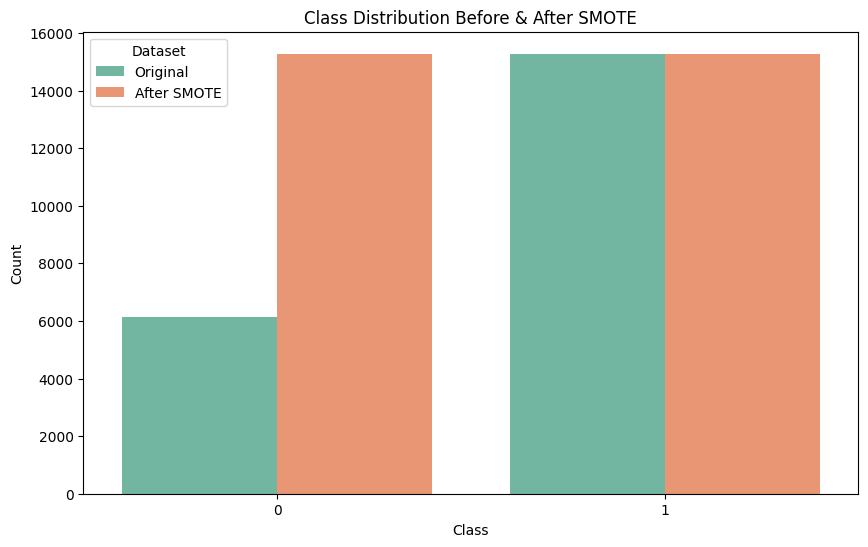

In [49]:
df_before = pd.DataFrame({'Class': y.value_counts().index, 
                          'Count': y.value_counts().values, 
                          'Dataset': 'Original'})
df_after = pd.DataFrame({'Class': Y_ores.value_counts().index, 
                         'Count': Y_ores.value_counts().values, 
                         'Dataset': 'After SMOTE'})
df_combined = pd.concat([df_before, df_after])
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Count', hue='Dataset', data=df_combined , palette="Set2")
plt.title('Class Distribution Before & After SMOTE')
plt.show()

In [50]:
balanced_df = pd.DataFrame(X_ores, columns=X.columns)
balanced_df["booking_status"] = Y_ores

balanced_df.sample(7)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
1433,2,0,0,1,0,0,0,0,2018,12,7,4,0.0,0.0,0.0,98.000000,2,1
18818,1,0,0,1,3,0,0,36,2018,9,27,4,0.0,0.0,0.0,72.070000,1,1
18505,2,0,2,5,3,0,0,25,2018,3,8,4,0.0,0.0,0.0,81.860000,1,0
8964,2,0,0,2,0,0,1,125,2018,7,20,4,0.0,0.0,0.0,72.250000,0,0
2562,2,0,0,3,0,0,0,143,2018,8,25,3,0.0,0.0,0.0,100.000000,0,1
18693,2,0,0,2,3,0,0,44,2018,6,22,4,0.0,0.0,0.0,89.100000,1,0
28346,2,0,1,3,0,0,3,111,2018,6,1,4,0.0,0.0,0.0,132.768385,0,0


In [51]:
df = balanced_df.copy()
df.shape

(30564, 18)

In [52]:
##### FEATURE SELECTION

# We have around 18 features, we can do feature selection to select the most prominent ones for training purpose.
# Feature selection is crucial for improving model performance, reducing overfitting, and speeding up training
len(df.columns)

18

In [53]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=['booking_status'])
Y = df['booking_status']

rf = RandomForestClassifier(random_state=11)
rf.fit(X, Y)

RandomForestClassifier(random_state=11)

In [54]:
importance = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature' : X.columns,
    'Importance': importance
}).sort_values(by="Importance", ascending=False)

feature_importance_df

,Feature,Importance
7,lead_time,0.268579
16,no_of_special_requests,0.181622
15,avg_price_per_room,0.148921
9,arrival_month,0.086825
10,arrival_date,0.083158
11,market_segment_type,0.051441
3,no_of_week_nights,0.045384
2,no_of_weekend_nights,0.030169
4,type_of_meal_plan,0.020970
6,room_type_reserved,0.019618


In [55]:
from sklearn.feature_selection import RFE

# Initialize RFE with Random Forest
rfe = RFE(estimator=RandomForestClassifier(random_state=11), n_features_to_select=10)
rfe.fit(X, Y)

# Get selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'room_type_reserved', 'lead_time', 'arrival_month', 'arrival_date',
       'market_segment_type', 'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')


In [56]:
print(selected_features.values.tolist())

['no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'room_type_reserved', 'lead_time', 'arrival_month', 'arrival_date', 'market_segment_type', 'avg_price_per_room', 'no_of_special_requests']


In [57]:
### We select top k features for our task (k=10)
top_10_features = feature_importance_df.head(10).values
top_10_df = df[selected_features.values.tolist() + ["booking_status"]]
print(f'Top10_df : {top_10_df.shape}')
top_10_df.sample(10)

Top10_df : (30564, 11)


,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,avg_price_per_room,no_of_special_requests,booking_status
13958,0,3,0,3,122,8,2,4,118.800000,1,1
15968,1,1,0,0,0,4,23,4,114.000000,0,1
30035,0,0,0,3,40,3,21,4,131.400000,0,0
17070,2,2,0,3,81,3,26,4,95.200000,0,0
27041,0,2,1,0,29,4,14,4,103.183294,0,0
18349,3,5,0,5,155,5,22,4,177.350000,0,0
920,2,3,0,3,115,4,29,4,104.550000,1,0
3390,2,1,0,0,6,10,11,3,100.800000,0,1
5339,1,2,0,0,7,1,4,4,83.000000,0,1
26193,2,2,1,0,64,8,16,4,106.285515,0,0


In [58]:
df = top_10_df.copy()


<h3 style="text-align: center;color:#e0fcfe">Model Selection & Training</h3>

In [59]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_recall_curve, precision_score, f1_score

In [60]:
X = df.drop(columns=['booking_status'])
Y = df['booking_status']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size=0.2, random_state=11)

In [61]:
Classifiers = {
    "Random Forest" : RandomForestClassifier(random_state=11),
    "Logistic Regression" : LogisticRegression(random_state=11),
    "Gradient Boost" : GradientBoostingClassifier(random_state=11),
    "Support Vector Classifier" : SVC(random_state=11),
    "Decision Tree" : DecisionTreeClassifier(random_state=11),
    "KNN" : KNeighborsClassifier(),
    "Naive BAyes" : GaussianNB(),
    "XGBOOST" : XGBClassifier(random_state=11),
    "AdaBoost": AdaBoostClassifier(random_state=11),
    "LGBM" : LGBMClassifier(random_state=11)
}

In [62]:
metrics = {
    "Model" : [],
    "Accuracy" : [],
    "Precision" : [],
    "Recall" : [],
    "F1_Score" : []
}

In [63]:
for model_name, classifier_model in Classifiers.items():
    classifier_model.fit(X_train, Y_train)

    Y_pred = classifier_model.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)

    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1_Score'].append(f1)
    

[LightGBM] [Info] Number of positive: 12197, number of negative: 12254
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 24451, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498834 -> initscore=-0.004662
[LightGBM] [Info] Start training from score -0.004662


In [64]:
metrics_df = pd.DataFrame(metrics)
metrics_df

,Model,Accuracy,Precision,Recall,F1_Score
0,Random Forest,0.884181,0.886504,0.883630,0.885065
1,Logistic Regression,0.773924,0.796587,0.741329,0.767965
2,Gradient Boost,0.838050,0.826629,0.859319,0.842657
3,Support Vector Classifier,0.724194,0.727184,0.725770,0.726476
4,Decision Tree,0.838868,0.849301,0.827553,0.838286
5,KNN,0.773434,0.840272,0.680389,0.751925
6,Naive BAyes,0.775397,0.799930,0.740032,0.768816
7,XGBOOST,0.871094,0.874226,0.869692,0.871953
8,AdaBoost,0.823164,0.819108,0.833712,0.826345
9,LGBM,0.860134,0.853744,0.872285,0.862915


In [65]:
metrics_df['Average'] = metrics_df.iloc[:, 1:].mean(axis=1)
best_model = metrics_df.loc[metrics_df['Average'].idxmax()]
print(best_model)


Model        Random Forest
Accuracy          0.884181
Precision         0.886504
Recall             0.88363
F1_Score          0.885065
Average           0.884845
Name: 0, dtype: object


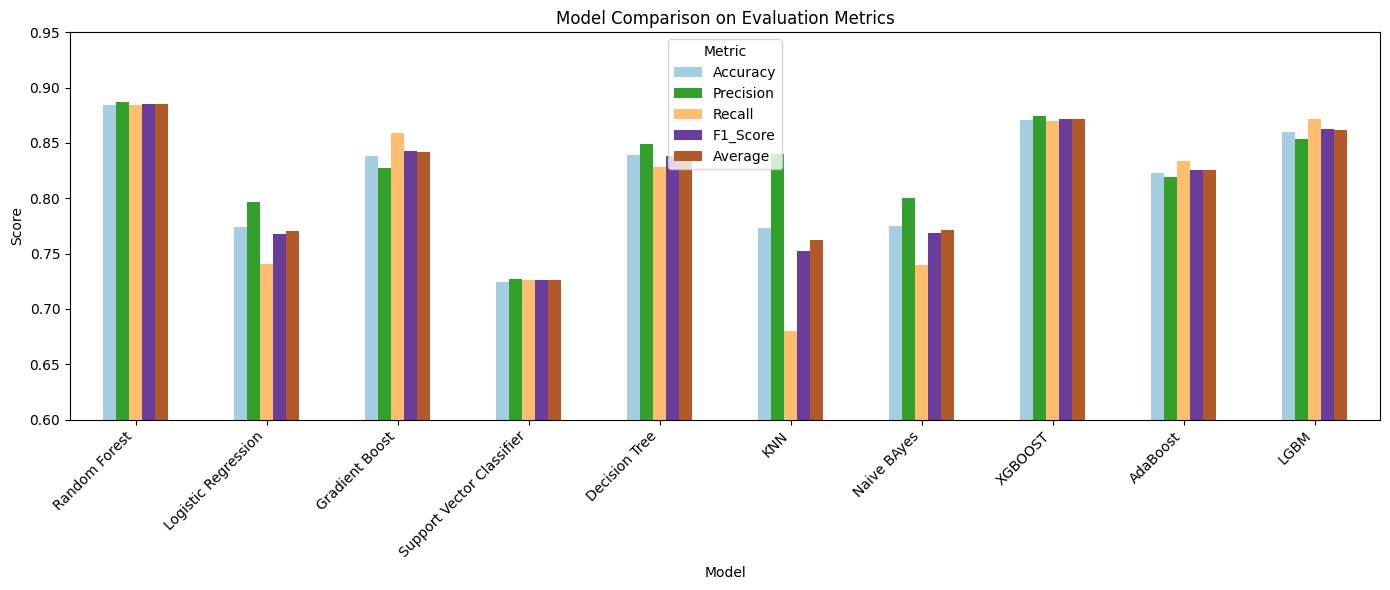

In [66]:
metrics_df_rounded = metrics_df.copy()
metrics_df_rounded.iloc[:, 1:] = metrics_df.iloc[:, 1:].round(3)

metrics_df_rounded.set_index('Model').plot(kind='bar', figsize=(14, 6), colormap="Paired")
plt.title('Model Comparison on Evaluation Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.6, 0.95)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

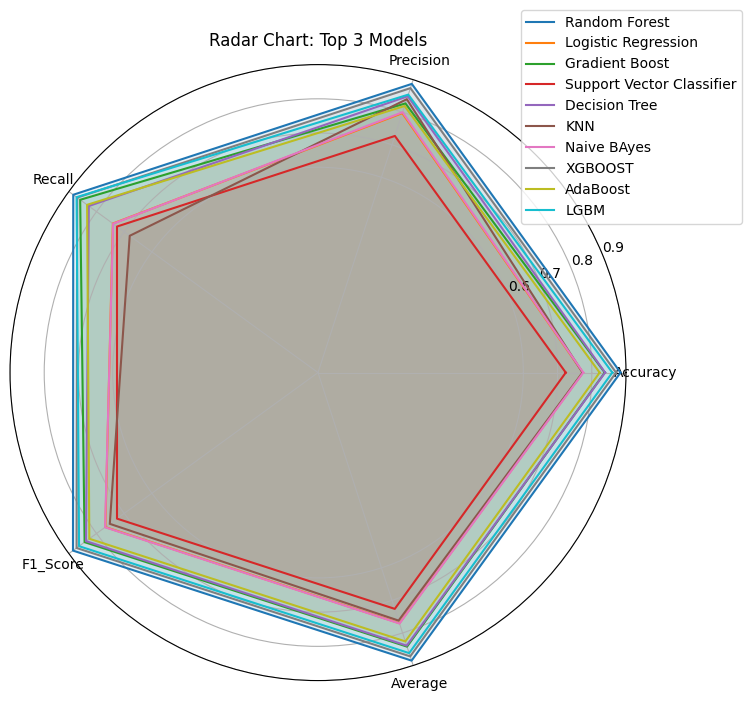

In [67]:
top_models = metrics_df_rounded.head(10)

# Set up radar chart
labels = metrics_df.columns[1:]
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for idx, row in top_models.iterrows():
    values = row[1:].tolist()
    values += values[:1]
    ax.plot(angles, values, label=row['Model'])
    ax.fill(angles, values, alpha=0.1)

ax.set_title('Radar Chart: Top 3 Models')
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticks([0.6, 0.7, 0.8, 0.9])
ax.set_yticklabels(['0.6', '0.7', '0.8', '0.9'])
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()


In [68]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [69]:
X = df.drop(columns=['booking_status'])
Y = df['booking_status']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size=0.2, random_state=11)

In [70]:
rf = RandomForestClassifier(random_state=11)

In [71]:
param_dict = {
    'n_estimators' : randint(100,500),
    'max_depth' : randint(10,50),
    'min_samples_split' : randint(2,12),
    'min_samples_leaf' : randint(1,6),
    'bootstrap' : [True, False] 
}

In [ ]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dict,
    n_iter=10,
    cv=5,
    verbose=2,
    random_state=11,
    scoring='accuracy'
)

# random_search.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=False, max_depth=26, min_samples_leaf=4, min_samples_split=3, n_estimators=369; total time=  14.2s
[CV] END bootstrap=False, max_depth=26, min_samples_leaf=4, min_samples_split=3, n_estimators=369; total time=  13.6s
[CV] END bootstrap=False, max_depth=26, min_samples_leaf=4, min_samples_split=3, n_estimators=369; total time=  13.9s
[CV] END bootstrap=False, max_depth=26, min_samples_leaf=4, min_samples_split=3, n_estimators=369; total time=  13.4s
[CV] END bootstrap=False, max_depth=26, min_samples_leaf=4, min_samples_split=3, n_estimators=369; total time=  13.2s
[CV] END bootstrap=True, max_depth=43, min_samples_leaf=3, min_samples_split=10, n_estimators=209; total time=   5.4s
[CV] END bootstrap=True, max_depth=43, min_samples_leaf=3, min_samples_split=10, n_estimators=209; total time=   5.2s
[CV] END bootstrap=True, max_depth=43, min_samples_leaf=3, min_samples_split=10, n_estimators=209; total time=   

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=11),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f2de4355c40>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f2de59a24b0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f2de59a2b10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f2de59a0410>},
                   random_state=11, scoring='accuracy', verbose=2)

In [198]:
print(f'RandomCV best params: {random_search.best_params_}')

RandomCV best params: {'bootstrap': False, 'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 383}


In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def objective(trial):
    model = RandomForestClassifier(
        n_estimators=trial.suggest_int('n_estimators', 100, 500),
        max_depth=trial.suggest_int('max_depth', 10, 50),
        min_samples_split=trial.suggest_int('min_samples_split', 2, 12),
        min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 6),
        bootstrap=trial.suggest_categorical('bootstrap', [True, False])
    )
    score = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy').mean()
    return score

study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=5)

print("Best params:", study.best_params)


[I 2025-05-11 23:25:24,790] A new study created in memory with name: no-name-47a3beb0-3a7b-4a4b-8c78-091e6398f1e7
[I 2025-05-11 23:25:53,259] Trial 0 finished with value: 0.8686756903774263 and parameters: {'n_estimators': 176, 'max_depth': 16, 'min_samples_split': 10, 'min_samples_leaf': 4, 'bootstrap': False}. Best is trial 0 with value: 0.8686756903774263.
[I 2025-05-11 23:26:11,651] Trial 1 finished with value: 0.8683076340291984 and parameters: {'n_estimators': 106, 'max_depth': 37, 'min_samples_split': 11, 'min_samples_leaf': 6, 'bootstrap': False}. Best is trial 0 with value: 0.8686756903774263.
[I 2025-05-11 23:27:21,368] Trial 2 finished with value: 0.8754647888383948 and parameters: {'n_estimators': 369, 'max_depth': 18, 'min_samples_split': 7, 'min_samples_leaf': 2, 'bootstrap': False}. Best is trial 2 with value: 0.8754647888383948.
[I 2025-05-11 23:28:07,778] Trial 3 finished with value: 0.8744015279514687 and parameters: {'n_estimators': 262, 'max_depth': 17, 'min_samples

Best params: {'n_estimators': 369, 'max_depth': 18, 'min_samples_split': 7, 'min_samples_leaf': 2, 'bootstrap': False}


In [199]:
best_rf_model = random_search.best_estimator_

accuracy: 0.8601341403566171
precision: 0.853743654822335
recall: 0.8722852512155591
f1: 0.862914862914863
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      3028
           1       0.85      0.87      0.86      3085

    accuracy                           0.86      6113
   macro avg       0.86      0.86      0.86      6113
weighted avg       0.86      0.86      0.86      6113



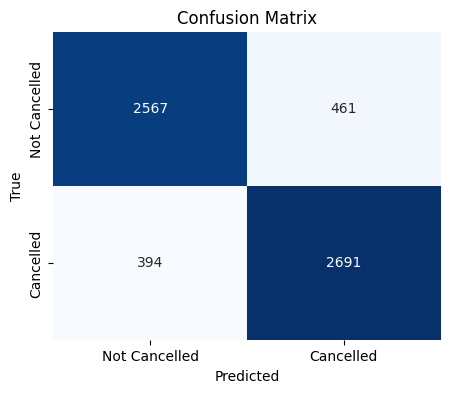

In [202]:
y_pred = best_rf_model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1: {f1}')
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, Y_pred))
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks([0.5, 1.5], ['Not Cancelled', 'Cancelled'])
plt.yticks([0.5, 1.5], ['Not Cancelled', 'Cancelled'])
plt.show();

In [203]:
import joblib

joblib.dump(best_rf_model, "rndm_forest.pkl")

['rndm_forest.pkl']

In [204]:
loaded_model = joblib.load('./rndm_forest.pkl')

In [74]:
mapping['booking_status']

{'Canceled': 0, 'Not_Canceled': 1}

In [73]:
num_col

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [122]:
# from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer

# num_pipeline = Pipeline([
#     ("scaler", StandardScaler()),
# ])

# cat_pipeline = Pipeline([
#     ("ord_encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
# ])

# preprocessor = ColumnTransformer(transformers=[
#     ("cat", cat_pipeline, cat_col),
#     ("num", num_pipeline, num_col)
# ])


In [123]:
# X = df.drop(columns=["booking_status"], axis=1)
# Y = df[target_col]

# label_encoder = LabelEncoder()
# Y = label_encoder.fit_transform(Y)

In [124]:
# X = preprocessor.fit_transform(X)
# X

In [125]:
# from sklearn.model_selection import train_test_split


# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=11)

In [126]:
# X_train.shape

In [127]:
# import torch 
# import torch.nn as nn 
# import torch.functional as F 
# from torchinfo import summary
# from tqdm import tqdm
# from torch.utils.data import DataLoader, Dataset

In [128]:
# class Classifier(nn.Module):
#     def __init__(self, num_features=17,num_classes=2):
#         super().__init__()
#         self.num_classes = num_classes
#         self.num_features = num_features
#         self.classifier = nn.Sequential(
#             nn.Linear(num_features, 128),
#             nn.ReLU(),
#             nn.Linear(128, 256),
#             nn.LeakyReLU(0.03),
#             nn.BatchNorm1d(256),
#             nn.Linear(256, 128),
#             nn.Tanh(),
#             nn.Linear(128, 2),
#             nn.Sigmoid(),
#         )

#     def forward(self, X):
#         return self.classifier(X)
    

# num_classes = 2
# num_features = X_train.shape[1]

# model = Classifier(num_features, num_classes)
# summary(model, input_size=(1, 17))

In [129]:
# #### HYPERPARAMETERS
# NUM_EPOCHS = 50
# LEARNING_RATE = 3e-4
# BATCH_SIZE = 64

# from torch.utils.data import Dataset, DataLoader
# import torch

# class HotelDataset(Dataset):
#     def __init__(self, X, y):
#         self.X = torch.tensor(X, dtype=torch.float32)
#         self.y = torch.tensor(y, dtype=torch.long)  # For CrossEntropyLoss

#     def __len__(self):
#         return len(self.X)

#     def __getitem__(self, idx):
#         return self.X[idx], self.y[idx]


In [130]:
# train_dataset = HotelDataset(X_train, Y_train)
# test_dataset = HotelDataset(X_test, Y_test)

# train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)


In [131]:
# import torch.nn as nn

# model = Classifier(num_features=X_train.shape[1], num_classes=2)
# optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
# criterion = nn.CrossEntropyLoss()


In [132]:
# from tqdm import tqdm

# NUM_EPOCHS = 50

# for epoch in range(NUM_EPOCHS):
#     model.train()
#     epoch_loss = 0
#     correct = 0
#     total = 0

#     loop = tqdm(train_loader, desc=f"Epoch [{epoch+1}/{NUM_EPOCHS}]", colour='green')
    
#     for batch_X, batch_y in loop:
#         optimizer.zero_grad()
#         outputs = model(batch_X)
#         loss = criterion(outputs, batch_y)
#         loss.backward()
#         optimizer.step()

#         epoch_loss += loss.item()

#         # Calculate accuracy
#         _, preds = torch.max(outputs, 1)
#         correct += (preds == batch_y).sum().item()
#         total += batch_y.size(0)

#         loop.set_postfix(loss=loss.item(), acc=100.0 * correct / total)

#     print(f"Epoch {epoch+1} | Loss: {epoch_loss/len(train_loader):.4f} | Accuracy: {100.0 * correct / total:.2f}%")


In [133]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X)
        _, preds = torch.max(outputs, 1)
        correct += (preds == batch_y).sum().item()
        total += batch_y.size(0)

print(f"Test Accuracy: {100.0 * correct / total:.2f}%")


Test Accuracy: 29.09%
